# 데이터 전처리

# 1. 데이터 로드 및 구조 확인
- df=pd.read_csv()
- df.describe(), df.info(), df.head()

In [46]:
df.info()     #SW특기의 경우 6개가 non-null, 나머지2개 null/  dtype으로 데이터타입확인

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, 1번 to 8번
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   이름      8 non-null      object
 1   학교      8 non-null      object
 2   키       8 non-null      int64 
 3   국어      8 non-null      int64 
 4   영어      8 non-null      int64 
 5   수학      8 non-null      int64 
 6   과학      8 non-null      int64 
 7   사회      8 non-null      int64 
 8   SW특기    6 non-null      object
dtypes: int64(6), object(3)
memory usage: 940.0+ bytes


# 2. 정렬 및 추출
- df.sort_index(), df.sort_values(column명)
- df.loc이나 df.iloc으로 원하는 부분만->비교연산자(==,>,<,!=)나 isin, contain 등 활용
- df.drop이나 df['new']=로 행이나 열 제거or 추가

# 3. 결측치 처리
- isnull()이나 isna()사용  -> 둘은 사실상 동일
- 1. dropna()로 데이터 자체 제거
- 2. fillna()로 ''삽입 or 0삽입 or mean,median 삽입 ->해당 분야의 표준에 맞춤

In [21]:
print(df['SW특기'].isnull().sum())   #으로 열별 nan개수
print(df.isnull().sum())       #각 컬럼별 nan개수
df.isnull().sum().sum()     #두번 sum으로 전체 nan개수세기

2
지원번호    0
이름      0
학교      0
키       0
국어      0
영어      0
수학      0
과학      0
사회      0
SW특기    2
dtype: int64


2

In [ ]:
df['column']=df['column'].fillna(df['column'].mean())  #nan에 평균채움

### replace도 사용가능

In [ ]:
# nan이 아닌 ' '와 같은 공백에 값 넣고 싶을 경우
df['column']=df['column'].replace({' ':'hi'})

In [ ]:
# nan을 넣기
import numpy as np

df['column']=df['column'].replace({' ':np.nan})

# 4. 중복값 제거
- drop_duplicates

In [36]:
df.loc['9번']=df.loc['1번']
df

,이름,학교,키,국어,영어,수학,과학,사회,SW특기
지원번호,,,,,,,,,
1번,채치수,북산고,197,90,85,100,95,85,Python
2번,정대만,북산고,184,40,35,50,55,25,Java
3번,송태섭,북산고,168,80,75,70,80,75,Javascript
4번,서태웅,북산고,187,40,60,70,75,80,NaN
5번,강백호,북산고,188,15,20,10,35,10,NaN
6번,변덕규,능남고,202,80,100,95,85,80,C
7번,황태산,능남고,188,55,65,45,40,35,PYTHON
8번,윤대협,능남고,190,100,85,90,95,95,C#
9번,채치수,북산고,197,90,85,100,95,85,Python


In [39]:
df.duplicated()   #나중값을 false로

지원번호
1번    False
2번    False
3번    False
4번    False
5번    False
6번    False
7번    False
8번    False
9번     True
dtype: bool

In [43]:
df.drop_duplicates(inplace=True)    #중복값 제거-> keep='last'옵션 사용하면 마지막껄 남겨둠
df

,이름,학교,키,국어,영어,수학,과학,사회,SW특기
지원번호,,,,,,,,,
1번,채치수,북산고,197,90,85,100,95,85,Python
2번,정대만,북산고,184,40,35,50,55,25,Java
3번,송태섭,북산고,168,80,75,70,80,75,Javascript
4번,서태웅,북산고,187,40,60,70,75,80,NaN
5번,강백호,북산고,188,15,20,10,35,10,NaN
6번,변덕규,능남고,202,80,100,95,85,80,C
7번,황태산,능남고,188,55,65,45,40,35,PYTHON
8번,윤대협,능남고,190,100,85,90,95,95,C#


# 5. 데이터타입 변환
### 종류: int64(정수), float64(실수), object(문자형), string(문자형), bool, datetime64, category(R의 팩터)
- df['column'].astype(바꿀려는타입)
- pd.to_datetime(df['column'])

In [55]:
# dtype=''로 데이터 타입지정
temp=pd.Series([-20,-10,10,20],dtype='object')  #숫자를 넣었음에도 object
temp.info()

<class 'pandas.core.series.Series'>
RangeIndex: 4 entries, 0 to 3
Series name: None
Non-Null Count  Dtype 
--------------  ----- 
4 non-null      object
dtypes: object(1)
memory usage: 164.0+ bytes


In [56]:
df['current_time'] = pd.Timestamp.now()   #pd의 현재시간을 나타내는 함수
df

,이름,학교,키,국어,영어,수학,과학,사회,SW특기,current_time
지원번호,,,,,,,,,,
1번,채치수,북산고,197,90,85,100,95,85,Python,2025-03-30 21:21:50.540597
2번,정대만,북산고,184,40,35,50,55,25,Java,2025-03-30 21:21:50.540597
3번,송태섭,북산고,168,80,75,70,80,75,Javascript,2025-03-30 21:21:50.540597
4번,서태웅,북산고,187,40,60,70,75,80,NaN,2025-03-30 21:21:50.540597
5번,강백호,북산고,188,15,20,10,35,10,NaN,2025-03-30 21:21:50.540597
6번,변덕규,능남고,202,80,100,95,85,80,C,2025-03-30 21:21:50.540597
7번,황태산,능남고,188,55,65,45,40,35,PYTHON,2025-03-30 21:21:50.540597
8번,윤대협,능남고,190,100,85,90,95,95,C#,2025-03-30 21:21:50.540597


In [57]:
df['current_time'].info()  #시간은 datetime형태

<class 'pandas.core.series.Series'>
Index: 8 entries, 1번 to 8번
Series name: current_time
Non-Null Count  Dtype         
--------------  -----         
8 non-null      datetime64[us]
dtypes: datetime64[us](1)
memory usage: 428.0+ bytes


In [58]:
df['current_time']=df['current_time'].astype(object)   #datetime->object
df['current_time'].info()

<class 'pandas.core.series.Series'>
Index: 8 entries, 1번 to 8번
Series name: current_time
Non-Null Count  Dtype 
--------------  ----- 
8 non-null      object
dtypes: object(1)
memory usage: 428.0+ bytes


In [59]:
# pd.to_datetime으로 다시 datetime64형태로
df['current_time'] = pd.to_datetime(df['current_time'])   
df['current_time'].info()    

<class 'pandas.core.series.Series'>
Index: 8 entries, 1번 to 8번
Series name: current_time
Non-Null Count  Dtype         
--------------  -----         
8 non-null      datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 428.0+ bytes


# 6. 추가 처리

### 텍스트 통일
- 같은 의미를 지니는 텍스트나 다른 카테고리 값을 동일하게 

In [ ]:
# 
ext_dic = {'DOCX': 'DOC',
           'XLSX': 'XLS',
           'PPTX': 'PPT',
           'PPSX': 'PPT',
           'PPS': 'PPT',
           'ODT': 'TXT',
           'PNG': 'JPG'}

# 해당 컬럼에 replace 함수와 dict 적용
df['확장자'] = df['확장자'].replace(ext_dic)

### 복잡한 고유식별자의 간단화
- 새로운 0부터 1씩 증가하는 값 부여

In [ ]:
newid = [] # empty list
num = 0 # default setting

# loop
for i in range(len(df)-1):
    if df.ioc[i, 'id'] == df.ioc[i+1, 'id']:   #현재행과 다음행을 비교해 같으면 숫자 그대로 해서 newid에 넣음
        newid.append(num)
    else:
        newid.append(num)     #다르면 숫자넣고 1증가
        num += 1
df['newid']=newid    #새로운 간단한 고유식별자 부여

### 대소문자 처리
- df가 아닌 개별컬럼에 적용시켜야함
- dtype이 object인 컬럼에만 가능

In [67]:
for i in df.columns:
    if df[i].dtype=='object':
        df[i]=df[i].str.lower()
df

,이름,학교,키,국어,영어,수학,과학,사회,SW특기,current_time
지원번호,,,,,,,,,,
1번,채치수,북산고,197,90,85,100,95,85,python,2025-03-30 21:21:50.540597
2번,정대만,북산고,184,40,35,50,55,25,java,2025-03-30 21:21:50.540597
3번,송태섭,북산고,168,80,75,70,80,75,javascript,2025-03-30 21:21:50.540597
4번,서태웅,북산고,187,40,60,70,75,80,NaN,2025-03-30 21:21:50.540597
5번,강백호,북산고,188,15,20,10,35,10,NaN,2025-03-30 21:21:50.540597
6번,변덕규,능남고,202,80,100,95,85,80,c,2025-03-30 21:21:50.540597
7번,황태산,능남고,188,55,65,45,40,35,python,2025-03-30 21:21:50.540597
8번,윤대협,능남고,190,100,85,90,95,95,c#,2025-03-30 21:21:50.540597


# 7. 이상치(극단적인 값) 처리
- z-score: 표준화 후 기준을 넘으면 제거(값중에 평균으로 빼고 표준편차로 나눴을때 -z~z값 밖에있는 애들 제거)
- IQR: Q1-IQR*1.5 값과 Q3-IQR*1.5사이의 값만 가져옴

In [73]:
# z-score
def outlier(df, col, z):   # z는 내가 지정할 값
    return df[abs(df[col]-np.mean(df[col]))/np.std(df[col])>z].index     #값을 평균에서 빼고 표준편차로 나눈것중 z보다 큰애들만 True

outlier(df,'키',2)    #2로 하면 표준에서 -2~2밖에 있는 애들만 가져옴->얘네들이 이상치임

Index(['3번'], dtype='object', name='지원번호')

In [78]:
df.loc[outlier(df,'키',2)]

,이름,학교,키,국어,영어,수학,과학,사회,SW특기,current_time
지원번호,,,,,,,,,,
3번,송태섭,북산고,168,80,75,70,80,75,javascript,2025-03-30 21:21:50.540597


In [80]:
df.drop(index=outlier(df,'키',2))   #이런식으로 제거

,이름,학교,키,국어,영어,수학,과학,사회,SW특기,current_time
지원번호,,,,,,,,,,
1번,채치수,북산고,197,90,85,100,95,85,python,2025-03-30 21:21:50.540597
2번,정대만,북산고,184,40,35,50,55,25,java,2025-03-30 21:21:50.540597
4번,서태웅,북산고,187,40,60,70,75,80,NaN,2025-03-30 21:21:50.540597
5번,강백호,북산고,188,15,20,10,35,10,NaN,2025-03-30 21:21:50.540597
6번,변덕규,능남고,202,80,100,95,85,80,c,2025-03-30 21:21:50.540597
7번,황태산,능남고,188,55,65,45,40,35,python,2025-03-30 21:21:50.540597
8번,윤대협,능남고,190,100,85,90,95,95,c#,2025-03-30 21:21:50.540597


In [ ]:
df.loc[outlier(df,'키',2)]['키']=0   #지정하고 싶은 값을 넣어줄수도 있음

# 8. 범주형(수치가 아닌 도시이름과 같은) 데이터 처리
- 문자를 숫자로
- 라벨인코딩: 범주형 변수를 0, 1, 2 등의 정수로 변환
- 원핫인코딩: 범주형 변수를 더미 변수로 변환-> 원하는 데이터만 1, 나머지는 0으로 채움

### -라벨 인코딩

In [82]:
# 라벨인코딩
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder() # 객체 생성

# 라벨 인코딩 할 피쳐의 종류와 개수 알아보기
print(df['학교'].value_counts())


le.fit_transform(df['학교'])  # 학교에 해당하는 데이터를 숫자로 바꿔줌->북산고는 1, 능남고는 0

학교
북산고    5
능남고    3
Name: count, dtype: int64


array([1, 1, 1, 1, 1, 0, 0, 0])

In [84]:
le.classes_  #어떤값이 어떤 숫자인지->왼쪽부터 0,1,2,...

array(['능남고', '북산고'], dtype=object)

### -one-hot encoding

In [98]:
# pd의 get_dummies함수 사용
ohe=pd.get_dummies(df['학교'],dtype=int)   #범주형 고유개수에 따라 열 개수도 그만큼 늘어남
ohe

,능남고,북산고
지원번호,,
1번,0,1
2번,0,1
3번,0,1
4번,0,1
5번,0,1
6번,1,0
7번,1,0
8번,1,0


In [99]:
# 기존 데이터에 열로 합치기
df=pd.concat([df,ohe],axis=1)
df

,이름,학교,키,국어,영어,수학,과학,사회,SW특기,current_time,le_value,능남고,북산고
지원번호,,,,,,,,,,,,,
1번,채치수,북산고,197,90,85,100,95,85,python,2025-03-30 21:21:50.540597,1,0,1
2번,정대만,북산고,184,40,35,50,55,25,java,2025-03-30 21:21:50.540597,1,0,1
3번,송태섭,북산고,168,80,75,70,80,75,javascript,2025-03-30 21:21:50.540597,1,0,1
4번,서태웅,북산고,187,40,60,70,75,80,NaN,2025-03-30 21:21:50.540597,1,0,1
5번,강백호,북산고,188,15,20,10,35,10,NaN,2025-03-30 21:21:50.540597,1,0,1
6번,변덕규,능남고,202,80,100,95,85,80,c,2025-03-30 21:21:50.540597,0,1,0
7번,황태산,능남고,188,55,65,45,40,35,python,2025-03-30 21:21:50.540597,0,1,0
8번,윤대협,능남고,190,100,85,90,95,95,c#,2025-03-30 21:21:50.540597,0,1,0


# 9. 스케일링->데이터별 단위를 일정하게 맞춤
- 표준화: 평균0, 표준편차 1로 변환
- 정규화: 데이터를 0과 1사이 값으로 변환

### 표준화

In [106]:
# 평균0, 표준편차 1로 변환
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['키','국어','영어','수학','과학','사회']])
print(df_scaled)

[[ 0.96351791  0.99589321  0.76948903  1.18976215  1.1250879   0.81126854]
 [-0.42823018 -0.81482171 -1.21628912 -0.57284844 -0.67505274 -1.18570017]
 [-2.14115091  0.63375022  0.3723334   0.13219579  0.45003516  0.47844042]
 [-0.10705755 -0.81482171 -0.22340004  0.13219579  0.22501758  0.64485448]
 [ 0.         -1.72017917 -1.81202256 -1.98293692 -1.57512306 -1.68494235]
 [ 1.49880564  0.63375022  1.36522248  1.01350109  0.67505274  0.64485448]
 [ 0.         -0.27160724 -0.02482223 -0.7491095  -1.35010548 -0.85287205]
 [ 0.21411509  1.35803619  0.76948903  0.83724003  1.1250879   1.14409666]]


In [ ]:
# 이후
df[['키','국어','영어','수학','과학','사회']]=df_scaled

### 정규화

In [107]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_normalized = scaler.fit_transform(df[['키','국어','영어','수학','과학','사회']])
print(df_normalized)     #0~1값으로

[[0.85294118 0.88235294 0.8125     1.         1.         0.88235294]
 [0.47058824 0.29411765 0.1875     0.44444444 0.33333333 0.17647059]
 [0.         0.76470588 0.6875     0.66666667 0.75       0.76470588]
 [0.55882353 0.29411765 0.5        0.66666667 0.66666667 0.82352941]
 [0.58823529 0.         0.         0.         0.         0.        ]
 [1.         0.76470588 1.         0.94444444 0.83333333 0.82352941]
 [0.58823529 0.47058824 0.5625     0.38888889 0.08333333 0.29411765]
 [0.64705882 1.         0.8125     0.88888889 1.         1.        ]]


### 로그 변환등의 기법도 같이 사용하기도 함

# 10. 그 외

## 1. 구간화(Binning): 수치형 데이터->범주형 데이터로

In [111]:
bins=[150,160,170,180,190,200,210]  #내가 정한 구간

intervals=pd.cut(df['키'],bins=bins)   #키에 대한 구간화
intervals     # (190,200]은 190초과 200이하를 의미

지원번호
1번    (190, 200]
2번    (180, 190]
3번    (160, 170]
4번    (180, 190]
5번    (180, 190]
6번    (200, 210]
7번    (180, 190]
8번    (180, 190]
Name: 키, dtype: category
Categories (6, interval[int64, right]): [(150, 160] < (160, 170] < (170, 180] < (180, 190] < (190, 200] < (200, 210]]

In [113]:
intervals.value_counts().sort_index()   #histogram처럼 볼 수 있음

키
(150, 160]    0
(160, 170]    1
(170, 180]    0
(180, 190]    5
(190, 200]    1
(200, 210]    1
Name: count, dtype: int64

In [114]:
pd.cut(df['키'],bins=5)    #5개 구간으로 나눔

지원번호
1번      (195.2, 202.0]
2번      (181.6, 188.4]
3번    (167.966, 174.8]
4번      (181.6, 188.4]
5번      (181.6, 188.4]
6번      (195.2, 202.0]
7번      (181.6, 188.4]
8번      (188.4, 195.2]
Name: 키, dtype: category
Categories (5, interval[float64, right]): [(167.966, 174.8] < (174.8, 181.6] < (181.6, 188.4] < (188.4, 195.2] < (195.2, 202.0]]

## 2. train set과 test set분리

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[feature], df[label], test_size = 0.2, random_state=10)

## 3. 텍스트 데이터는 전처리

## 4. 차원축소-PCA
- 고차원 데이터를 저차원으로 변환-> 중요한 특징(정보)을 최대한 보존하면서, 데이터를 구성하는 차원의 수를 줄이는 방법

### 6개의 차원을 2차원으로

In [131]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)   #두개의 주성분으로 차원 축소
df_pca = pca.fit_transform(df[['키','수학','국어','영어','과학','사회']])   #수치형만 가능
df_pca

array([[ 5.86250243e+01, -4.32412870e-02],
       [-5.43208951e+01, -1.30672528e+00],
       [ 2.36494928e+01,  9.53427765e-01],
       [ 9.28945937e-01, -2.85115438e+01],
       [-1.05905915e+02, -2.81554769e+00],
       [ 5.19162481e+01,  8.17162569e+00],
       [-3.79144988e+01,  2.25015451e+01],
       [ 6.30215980e+01,  1.05045953e+00]])

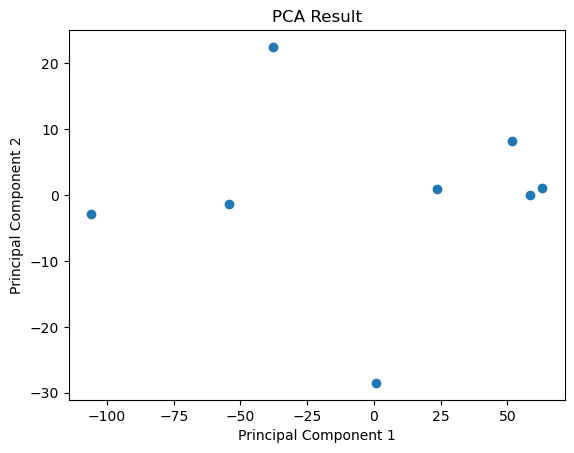

In [132]:
import matplotlib.pyplot as plt

plt.scatter(df_pca[:, 0], df_pca[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Result')
plt.show()

### 6차원을 3차원으로

[[ 5.86250243e+01 -4.32412870e-02  4.65382763e+00]
 [-5.43208951e+01 -1.30672528e+00 -1.01030029e+00]
 [ 2.36494928e+01  9.53427765e-01 -2.17794755e+01]
 [ 9.28945937e-01 -2.85115438e+01  6.60216822e+00]
 [-1.05905915e+02 -2.81554769e+00  1.40746141e-01]
 [ 5.19162481e+01  8.17162569e+00  1.79380040e+01]
 [-3.79144988e+01  2.25015451e+01  3.19671781e+00]
 [ 6.30215980e+01  1.05045953e+00 -9.74168802e+00]]


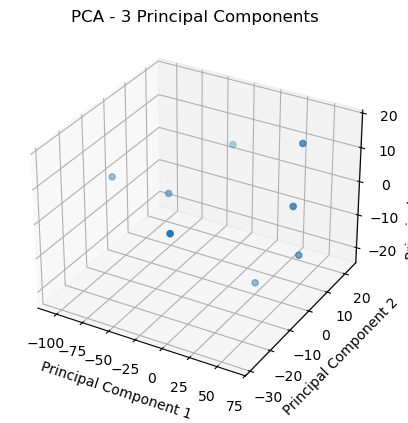

In [134]:
from mpl_toolkits.mplot3d import Axes3D

pca = PCA(n_components=3)   #세개의 주성분으로 차원 축소
df_pca = pca.fit_transform(df[['키','수학','국어','영어','과학','사회']])   #수치형만 가능
print(df_pca)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 3D 산점도 그리기
ax.scatter(df_pca[:, 0], df_pca[:, 1], df_pca[:, 2])

# 축 라벨 설정
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# 그래프 제목 설정
ax.set_title('PCA - 3 Principal Components')

# 그래프 표시
plt.show()

## 이 축소된 차원으로 분석 진행

## 5. 독립변수와 종속변수 나누기

In [120]:
x=df.iloc[:,:4]    #독립변수들
y=df.iloc[:,4]     #종속변수